# Introducing new features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skew, kurtosis

In [4]:
# retrieve data
def get_data(ticker, input_path = 'Data pre-processed python/'):
    input_file = input_path + ticker +'.csv'
    data = pd.read_csv(input_file, header=0, index_col=0)
    data.index = pd.to_datetime(data.index)
    data = data.astype(float)
    data = data.sort_index()
    return data

# Histograms

In [5]:
ticker = 'SPX'
data = get_data (ticker)
data.head()

,Close,Open,High,Low
Date,,,,
2006-02-07,1254.78,1265.02,1265.78,1253.61
2006-02-08,1265.65,1254.78,1266.47,1254.78
2006-02-09,1263.78,1265.65,1274.56,1262.80
2006-02-10,1266.99,1263.82,1269.89,1254.98
2006-02-13,1262.86,1266.99,1266.99,1258.34


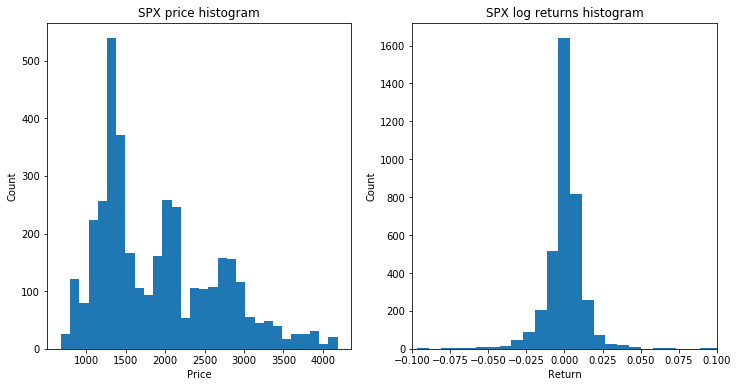

In [6]:
fig, axes = plt.subplots(1,2) # plot 1 by 2

ax = axes[0]
ax.hist(data['Close'], bins=30)
ax.set_title(ticker + ' price histogram')
ax.set_xlabel('Price')
ax.set_ylabel('Count')

ax = axes[1]
ax.hist(np.log(data['Close']).diff(1).dropna(), bins=30)
ax.set_title(ticker + ' log returns histogram')
ax.set_xlabel('Return')
ax.set_ylabel('Count')
ax.set_xlim([-0.1, 0.1])

fig.set_size_inches(12,6)

# New features implemented

In [7]:
# log return

def log_return(input_arr):
    return np.log(input_arr).diff(1)

In [8]:
# log return moving average

def ma_return (input_arr, w):
    return input_arr.rolling(w).mean()

In [9]:
# log return moving average standard deviation

def ma_std(input_arr, w):
    return input_arr.rolling(w).std()

In [10]:
# log return moving average skew

def ma_skew(input_arr, w):
    return input_arr.rolling(w).apply(skew, raw=True)

In [11]:
# log return moving average kurtosis

def ma_kurtosis(input_arr, w):
    return input_arr.rolling(w).apply(kurtosis, raw=True)

In [12]:
# high-low spread (HLS)

def hls(high, low):
    tmp = abs((high-low)/low)
    tmp = tmp.replace([np.inf, -np.inf], np.nan)
    tmp = tmp.fillna(0)
    
    return tmp

In [13]:
# relative high-low-close (RHLC)

def rhlc(high, low, close):
    tmp = (close-low)/(high-low)
    tmp = tmp.clip(0, 1)
    tmp = tmp.fillna(0.5)
    
    return tmp

# New features added

In [14]:
# define output path
output_path = 'Data features added/'

In [15]:
# Equities

tickers = ['SPX','DAX','NKY']

for ticker in tickers:

    data = get_data(ticker)
    features = pd.DataFrame()

    log_returns = log_return(data['Close'])
    
    features['LR'] = log_returns
    features['RHLC'] = rhlc(data['High'],data['Low'],data['Close'])
    features['HLS'] = hls(data['High'],data['Low'])
    
    for w in (5, 10, 22):
        features['LRMA'+str(w)] = ma_return(log_returns, w)
        features['LRSTDMA'+str(w)] = ma_std(log_returns, w)
        features['LRSMA'+str(w)] = ma_skew(log_returns, w)
        features['LRKMA'+str(w)] = ma_kurtosis(log_returns, w)
    
    features.to_csv(output_path+ticker+'.csv')
    
    print(ticker)
    print(features.shape)
    print(features.dropna().shape)

SPX
(3757, 15)
(3735, 15)
DAX
(3757, 15)
(3735, 15)
NKY
(3757, 15)
(3735, 15)


In [16]:
# Fixed income

tickers = ['US10YT','DE10YT','JP10YT']

for ticker in tickers:

    data = get_data(ticker)
    features = pd.DataFrame()

    log_returns = log_return(data['Close']+1) # added a constant '1' to handle negative bond yields
    
    features['LR'] = log_returns
    features['RHLC'] = rhlc(data['High'],data['Low'],data['Close'])
    features['HLS'] = hls(data['High'],data['Low'])
    
    for w in (5, 10, 22):
        features['LRMA'+str(w)] = ma_return(log_returns, w)
        features['LRSTDMA'+str(w)] = ma_std(log_returns, w)
        features['LRSMA'+str(w)] = ma_skew(log_returns, w)
        features['LRKMA'+str(w)] = ma_kurtosis(log_returns, w)
    
    features.to_csv(output_path+ticker+'.csv')
    
    print(ticker)
    print(features.shape)
    print(features.dropna().shape)

US10YT
(3757, 15)
(3735, 15)
DE10YT
(3757, 15)
(3735, 15)
JP10YT
(3757, 15)
(3735, 15)


In [17]:
# Cash equivalents

tickers = ['USDGBP','USDEUR','USDJPY'] #

for ticker in tickers:

    data = get_data(ticker)
    features = pd.DataFrame()

    log_returns = log_return(data['Close'])
    
    features['LR'] = log_returns
    features['RHLC'] = rhlc(data['High'],data['Low'],data['Close'])
    features['HLS'] = hls(data['High'],data['Low'])
    
    for w in (5, 10, 22):
        features['LRMA'+str(w)] = ma_return(log_returns, w)
        features['LRSTDMA'+str(w)] = ma_std(log_returns, w)
        features['LRSMA'+str(w)] = ma_skew(log_returns, w)
        features['LRKMA'+str(w)] = ma_kurtosis(log_returns, w)
    
    features.to_csv(output_path+ticker+'.csv')
    
    print(ticker)
    print(features.shape)
    print(features.dropna().shape)

USDGBP
(3757, 15)
(3735, 15)
USDEUR
(3757, 15)
(3735, 15)
USDJPY
(3757, 15)
(3735, 15)


In [18]:
# Commodities

tickers = ['ZG','T','NG']

for ticker in tickers:

    data = get_data(ticker)
    features = pd.DataFrame()

    log_returns = log_return(data['Close'])
    
    features['LR'] = log_returns
    features['RHLC'] = rhlc(data['High'],data['Low'],data['Close'])
    features['HLS'] = hls(data['High'],data['Low'])
    
    for w in (5, 10, 22):
        features['LRMA'+str(w)] = ma_return(log_returns, w)
        features['LRSTDMA'+str(w)] = ma_std(log_returns, w)
        features['LRSMA'+str(w)] = ma_skew(log_returns, w)
        features['LRKMA'+str(w)] = ma_kurtosis(log_returns, w)
    
    features.to_csv(output_path+ticker+'.csv')
    
    print(ticker)
    print(features.shape)
    print(features.dropna().shape)

ZG
(3757, 15)
(3735, 15)
T
(3757, 15)
(3735, 15)
NG
(3757, 15)
(3735, 15)


In [19]:
print(ticker)
features

NG


,LR,RHLC,HLS,LRMA5,LRSTDMA5,LRSMA5,LRKMA5,LRMA10,LRSTDMA10,LRSMA10,LRKMA10,LRMA22,LRSTDMA22,LRSMA22,LRKMA22
Date,,,,,,,,,,,,,,,
2006-02-07,NaN,0.585185,0.035065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-08,-0.015777,0.083333,0.054545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-09,-0.033656,0.358000,0.068493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-10,-0.022035,0.200000,0.045517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-13,-0.010028,0.267742,0.043296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,-0.006936,0.227273,0.016176,0.003697,0.018003,0.382578,-1.752625,0.007766,0.013946,-0.214527,-1.453211,0.003674,0.017767,-1.183865,1.752305
2021-04-26,0.021740,0.900000,0.037037,0.002961,0.016936,0.353530,-1.796210,0.008564,0.014543,-0.267195,-1.548423,0.003733,0.017828,-1.171864,1.717593
2021-04-27,0.029315,0.967742,0.033417,0.010431,0.018987,-0.352041,-1.691991,0.009256,0.015413,-0.165351,-1.505969,0.005296,0.018513,-1.172493,1.596455


# New features' histograms

In [20]:
# retrieve data

def get_features(ticker, input_path = 'Data features added/'):
    
    input_file = input_path + ticker +'.csv'
    data = pd.read_csv(input_file, header=0, index_col=0)
    data.index = pd.to_datetime(data.index)
    data = data.astype(float)
    data = data.sort_index()
    
    return data

In [21]:
features = get_features('DAX')
features.columns

Index(['LR', 'RHLC', 'HLS', 'LRMA5', 'LRSTDMA5', 'LRSMA5', 'LRKMA5', 'LRMA10',
       'LRSTDMA10', 'LRSMA10', 'LRKMA10', 'LRMA22', 'LRSTDMA22', 'LRSMA22',
       'LRKMA22'],
      dtype='object')

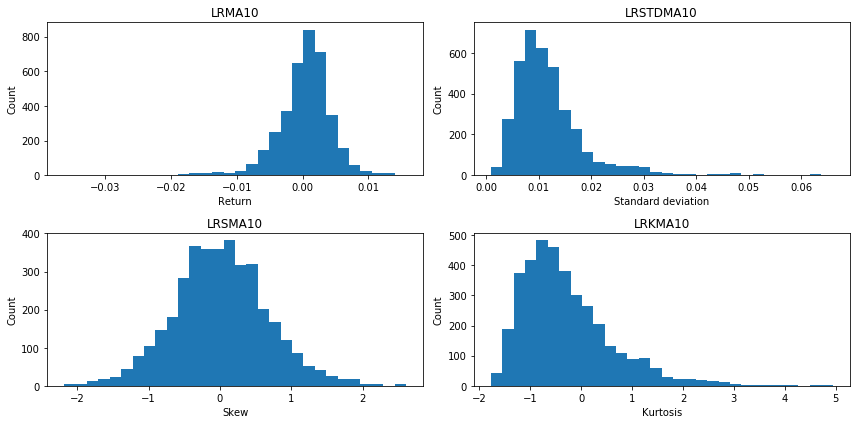

In [22]:
fig, axes = plt.subplots(2,2)

tmp = features['LRMA10'].copy().dropna()
ax=axes[0][0]
ax.hist(tmp, bins=30)
ax.set_title('LRMA10')
ax.set_xlabel('Return')
ax.set_ylabel('Count')

tmp = features['LRSTDMA10'].copy().dropna()
ax=axes[0][1]
ax.hist(tmp, bins=30)
ax.set_title('LRSTDMA10')
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Count')

tmp = features['LRSMA10'].copy().dropna()
ax=axes[1][0]
ax.hist(tmp, bins=30)
ax.set_title('LRSMA10')
ax.set_xlabel('Skew')
ax.set_ylabel('Count')

tmp = features['LRKMA10'].copy().dropna()
ax=axes[1][1]
ax.hist(tmp, bins=30)
ax.set_title('LRKMA10')
ax.set_xlabel('Kurtosis')
ax.set_ylabel('Count')

fig.set_size_inches(12,6)
fig.tight_layout()

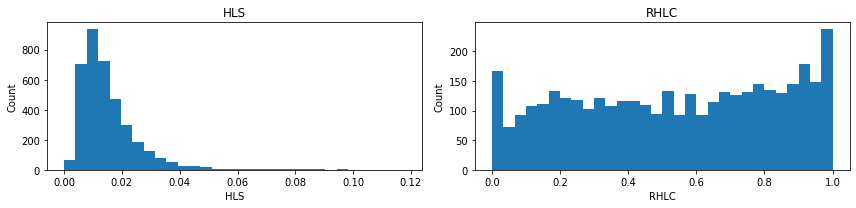

In [23]:
fig, axes = plt.subplots(1,2)

tmp = features['HLS'].copy().dropna()
ax=axes[0]
ax.hist(tmp, bins=30)
ax.set_title('HLS')
ax.set_xlabel('HLS')
ax.set_ylabel('Count')

tmp = features['RHLC'].copy().dropna()
ax=axes[1]
ax.hist(tmp, bins=30)
ax.set_title('RHLC')
ax.set_xlabel('RHLC')
ax.set_ylabel('Count')

fig.set_size_inches(12,3)
fig.tight_layout()

# Labels

In [24]:
# Retrieve data

def get_pre_processed_data(ticker, input_path = 'Data features added/'):
    input_file = input_path + ticker + '.csv'
    data = pd.read_csv(input_file, header=0, index_col=0)
    data.index = pd.to_datetime(data.index)
    data = data.astype(float)
    data = data.sort_index()
    return data

In [25]:
# all tickers

tickers = ['DAX','NKY','SPX','USDJPY','USDEUR','USDGBP','ZG','T','NG','DE10YT','JP10YT','US10YT']

In [26]:
# Find the indices in common with all datasets

idxs = None
for ticker in tickers:
    
    if idxs == None:
        idxs = set(get_pre_processed_data(ticker).dropna().index)
    else:
        idxs = idxs.intersection(set(get_pre_processed_data(ticker).dropna().index))
        
idxs_min = min(idxs)
idxs_max = max(idxs)

print(len(idxs))
print(idxs_min, idxs_max)

3735
2006-03-09 00:00:00 2021-04-30 00:00:00


In [29]:
# Labels for the supervised learning problem

labels = pd.DataFrame()

fixed_income_tickers = ['US10YT','DE10YT','JP10YT']

for ticker in tickers:
        
    if ticker in fixed_income_tickers:
        print(ticker)
        label = np.log(get_data(ticker)['Close']+1).diff(1).shift(-1)
    else:
        label = np.log(get_data(ticker)['Close']).diff(1).shift(-1)
        
    label = label[idxs_min:idxs_max]
    labels[ticker] = label

labels = labels.sort_index()

labels = labels.fillna(0)

labels.to_csv('Data features added/labels.csv')

idxs = labels.index

print(labels.shape)
labels.head()

DE10YT
JP10YT
US10YT
(3735, 12)


,DAX,NKY,SPX,USDJPY,USDEUR,USDGBP,ZG,T,NG,DE10YT,JP10YT,US10YT
Date,,,,,,,,,,,,
2006-03-09,0.012603,0.004897,0.007198,0.006495,0.000000,0.005715,-0.010319,-0.008470,0.006794,-0.001942,0.017793,0.005743
2006-03-10,0.008617,0.015142,0.002113,-0.000841,-0.003700,-0.003286,0.011418,0.029740,0.052894,0.008390,0.010452,0.001734
2006-03-13,0.002681,-0.007555,0.010342,-0.011170,-0.004795,-0.008001,0.010202,0.021303,0.022578,0.004489,-0.005212,-0.013077
2006-03-14,0.004690,0.004956,0.004261,-0.001362,-0.004456,-0.000699,0.002534,-0.014848,-0.003354,-0.010505,0.015556,0.005775
2006-03-15,-0.000117,-0.013749,0.001771,-0.004441,-0.009337,-0.005432,0.002348,0.022426,0.017211,0.007301,-0.000368,-0.014589


In [30]:
# reindex the features

output_path = 'Data features added/'

for ticker in tickers:
    
    print(ticker)
    features = get_pre_processed_data(ticker)
    print(features.shape)
    features = features.reindex(idxs)
    print(features.shape)
    features = features.sort_index()
    features = features.fillna(features.mean())
    features.to_csv(output_path+ticker+'.csv')    

DAX
(3757, 15)
(3735, 15)
NKY
(3757, 15)
(3735, 15)
SPX
(3757, 15)
(3735, 15)
USDJPY
(3757, 15)
(3735, 15)
USDEUR
(3757, 15)
(3735, 15)
USDGBP
(3757, 15)
(3735, 15)
ZG
(3757, 15)
(3735, 15)
T
(3757, 15)
(3735, 15)
NG
(3757, 15)
(3735, 15)
DE10YT
(3757, 15)
(3735, 15)
JP10YT
(3757, 15)
(3735, 15)
US10YT
(3757, 15)
(3735, 15)
